In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as stats

[0.8 0.8]
[0.8 0.8] 4.8


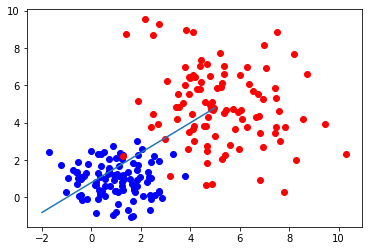

In [48]:
mean1=np.array((1,1))
cov1 = np.array(([1,0],[0,1]))
x1,y1 = np.random.multivariate_normal(mean1,cov1,100).T
plt.plot(x1,y1,'bo')

mean2=np.array((5,5))
cov2 = np.array(([4,0],[0,4]))
x2,y2 = np.random.multivariate_normal(mean2,cov2,100).T
plt.plot(x2,y2,'ro')

mCov = cov2 + cov1
inmCov = np.linalg.inv(mCov)
line = np.dot(inmCov,(mean2-mean1))

x = range(-2,6)
y = line[0]*x+line[1]
print(line)
plt.plot(x,y)

w = np.dot(np.linalg.inv(cov1+cov2),(mean2-mean1))
T = np.mean([np.dot(w,mean1), np.dot(w,mean2)])
print(w,T)

Lets test with sklearn algorithm

In [49]:
clf = LinearDiscriminantAnalysis()
tmp1 = np.vstack((x1,x2))
tmp2 = np.vstack((y1,y2))
X = np.hstack((tmp1,tmp2)).T
Y = np.array(np.vstack(([np.zeros((100,1)), np.ones((100,1))])))
Y = Y.ravel()
clf.fit(X,Y)
print(clf.coef_,clf.intercept_)

[[-0.02872677 -0.07736766]] [0.41820731]


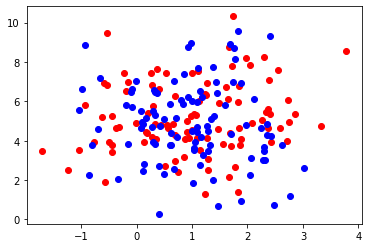

In [50]:
plt.plot(X[:100,0],X[:100,1],'ro')
plt.plot(X[100:,0],X[100:,1],'bo')